## Importing Libraries



In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from math import sqrt
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from sklearn.metrics import confusion_matrix, classification_report
import allcustommodules as sidra

## Loading Data

In [2]:
filename = 'D:/PRESC/PRESC/datasets/vehicles.csv'
dataset = pd.read_csv(filename)
print(dataset.head())

   COMPACTNESS  CIRCULARITY  DISTANCE_CIRCULARITY  RADIUS_RATIO  \
0           95           48                    83           178   
1           91           41                    84           141   
2          104           50                   106           209   
3           93           41                    82           159   
4           85           44                    70           205   

   PR.AXIS_ASPECT_RATIO  MAX.LENGTH_ASPECT_RATIO  SCATTER_RATIO  \
0                    72                       10            162   
1                    57                        9            149   
2                    66                       10            207   
3                    63                        9            144   
4                   103                       52            149   

   ELONGATEDNESS  PR.AXIS_RECTANGULARITY  MAX.LENGTH_RECTANGULARITY  \
0             42                      20                        159   
1             45                      19            

### Exploring Dataset
General shape of data set, attributes list and categories list

In [3]:
sidra.data_stats(dataset)

=========== SOME STATS of Dataset ===========
Shape of the dataset: (846, 19)
List of attribute columns ['COMPACTNESS', 'CIRCULARITY', 'DISTANCE_CIRCULARITY', 'RADIUS_RATIO', 'PR.AXIS_ASPECT_RATIO', 'MAX.LENGTH_ASPECT_RATIO', 'SCATTER_RATIO', 'ELONGATEDNESS', 'PR.AXIS_RECTANGULARITY', 'MAX.LENGTH_RECTANGULARITY', 'SCALED_VARIANCE_MAJOR', 'SCALED_VARIANCE_MINOR', 'SCALED_RADIUS_OF_GYRATION', 'SKEWNESS_ABOUT_MAJOR', 'SKEWNESS_ABOUT_MINOR', 'KURTOSIS_ABOUT_MAJOR', 'KURTOSIS_ABOUT_MINOR', 'HOLLOWS_RATIO', 'Class']
List of Categories  ['van' 'saab' 'bus' 'opel']


#### Checking if upsampling of data is required
Verifying that dataset is homogenous (that is there are almost equal number of datapoints belonging to each category)

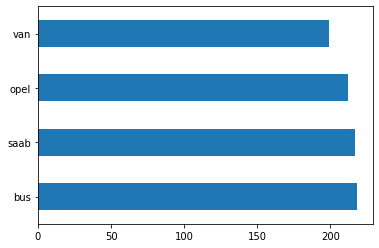

In [4]:
dataset['Class'].value_counts().plot(kind='barh')

## Tokenizing Target Column
Since random forest algo can only predict numbers we are tokenizing Class column/ Target values to numbers.

In [5]:
definitions = sidra.tokenize_target_column(dataset)

Updated tokenize 'Class' column - first 5 values
0    0
1    0
2    1
3    0
4    2
Name: Class, dtype: int64
Distinct Tokens used for converting Class column to integers
Index(['van', 'saab', 'bus', 'opel'], dtype='object')


## Train and Test data split
Now splitting data with 70 percent for training and 30 percent for testing

In [6]:
X_train, X_test, y_train, y_test = sidra.train_data_test_data_split(dataset)

We can do feature scaling here, opting out right now as I don't see any extreme values: https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/

## Training the model


In [7]:
classifier = sidra.train(X_train, y_train)

# Testing Model, checking accuracy and drawing confusion matrix 

In [8]:
y_pred = sidra.test(classifier, X_test)

In [9]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7559055118110236


Tried with cross validation score got almost 75 percent accuracy only same as when I used fit model

In [10]:
scores = cross_val_score(classifier, X_train, y_train, cv=5)
scores.mean()

0.7551159166179622

### Converting numeric target and predict values back to original labels

In [11]:
y_test, y_pred = sidra.untokenizing_testdata_prediction(y_test, y_pred, definitions)

============== Summary of all evaluation metics ===============
              precision    recall  f1-score   support

         bus       0.97      0.99      0.98        69
        opel       0.54      0.55      0.55        60
        saab       0.58      0.54      0.56        68
         van       0.92      0.95      0.93        57

    accuracy                           0.76       254
   macro avg       0.75      0.76      0.75       254
weighted avg       0.75      0.76      0.75       254

====================== Confusion Matrix=====================


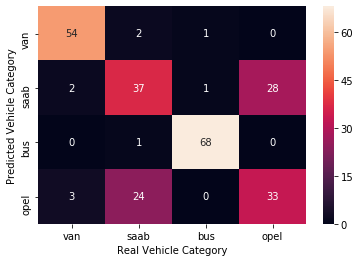

In [12]:
sidra.create_confusion_matrix_class_report(y_test, y_pred)

### Conclusion:
Overall I got 75 percent accuaracy which doesn't seem good, next step for today will be to first try to improve this model then I will experiment with other models to see comparative performance of other models on this dataset.